##**GRIP TSF**

##*Task 2 CV & IOT -> Colour Identification in Images*
#*By* ***Aneesh Panchal***
---
Implement an image color detector which identifies all the colors in an 
image.

**Importing Important Libraries.**

In [1]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import numpy as np
import cv2
from collections import Counter
from skimage.color import rgb2lab, deltaE_cie76
import os
%matplotlib inline

**Uploading and Reading Image.**

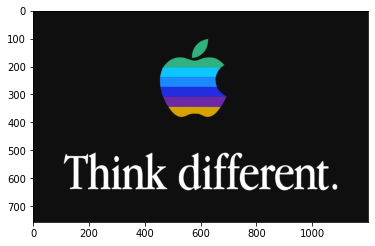

In [10]:
img = cv2.imread("/content/apple.png")
imgWidth = img.shape[1] - 40
plt.imshow(img)

**Converting Image into its original colour.**

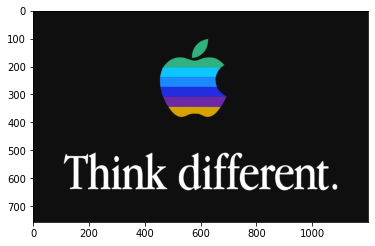

In [16]:
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img)

**Defining function used for discretion of various colour.**

In [12]:
def RGB2HEX(color):
    return "#{:02x}{:02x}{:02x}".format(int(color[0]), int(color[1]), int(color[2]))

**Importing and Reading image using OpenCV.**

In [13]:
def get_image(image_path):
    image = cv2.imread(image_path)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    return image

**Main Function used for colour identification in an image.**

In [14]:
def get_colors(image, number_of_colors, show_chart):
    
    modified_image = cv2.resize(image, (600, 400), interpolation = cv2.INTER_AREA)
    modified_image = modified_image.reshape(modified_image.shape[0]*modified_image.shape[1], 3)
    
    clf = KMeans(n_clusters = number_of_colors)
    labels = clf.fit_predict(modified_image)
    
    counts = Counter(labels)
    # sort to ensure correct color percentage
    counts = dict(sorted(counts.items()))
    
    center_colors = clf.cluster_centers_
    # We get ordered colors by iterating through the keys
    ordered_colors = [center_colors[i] for i in counts.keys()]
    hex_colors = [RGB2HEX(ordered_colors[i]) for i in counts.keys()]
    rgb_colors = [ordered_colors[i] for i in counts.keys()]

    if (show_chart):
        plt.figure(figsize = (8, 6))
        plt.pie(counts.values(), labels = hex_colors, colors = hex_colors)
    
    return rgb_colors

**Output Pie chart which shows different colour according to their percentage in the image.**

[array([15.17410417, 15.18204159, 15.16475198]),
 array([253.14632812, 253.14632812, 253.14632812]),
 array([252.35529158, 166.79481641,  19.5137689 ]),
 array([176.47898338, 176.47898338, 176.47898338]),
 array([143.62052506,  57.79611319, 102.85918854]),
 array([  0.23236196, 159.81058282, 210.04907975]),
 array([123.72086721, 174.67931346,  46.04471545]),
 array([220.39202825,  45.35721493,  33.73965691])]

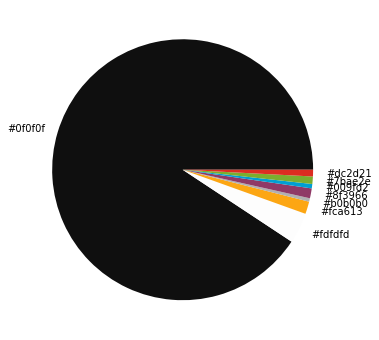

In [18]:
get_colors(get_image('/content/apple.png'), 8, True)

##**Task 2 CV & IOT Completed ! Thank You !**